In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('1639489159.test_baa.pickle')
df

,id,with_low_rank,strategy,num_qubits,depth,cnots,entganglement,entganglement (MW),max_fidelity_loss,total_saved_cnots,...,real_depth,real_depth_no_approx,real_fidelity_loss,real_fidelity_loss_benchmark,duration,benchmark_fidelity_loss_pass,approximation_calculation_pass,real_approximation_calculation_pass,cnot_prediction_calculation_pass,saved_cnots_calculation_pass
0,0,False,brute_force,7,14,151,0.571017,0.611636,0.1,96,...,89,364,0.0549,0.0,1.390601,True,True,True,True,True
1,0,False,greedy,7,14,151,0.571017,0.611636,0.1,96,...,89,364,0.0549,0.0,1.453099,True,True,True,True,True
2,0,True,brute_force,7,14,151,0.571017,0.611636,0.1,130,...,42,364,0.2203,0.0,1.375066,True,True,False,True,True
3,0,True,greedy,7,14,151,0.571017,0.611636,0.1,115,...,98,364,0.1951,0.0,1.749987,True,True,False,True,True
4,0,False,brute_force,7,14,151,0.571017,0.611636,0.2,146,...,17,364,0.1936,0.0,0.701098,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,99,True,greedy,7,7,84,0.673096,0.628701,0.9,84,...,2,68,0.6731,-0.0,0.093751,True,True,True,False,True
3996,99,False,brute_force,7,7,84,0.673096,0.628701,1.0,84,...,2,68,0.6731,-0.0,0.100685,True,True,True,False,True
3997,99,False,greedy,7,7,84,0.673096,0.628701,1.0,84,...,2,68,0.6539,-0.0,0.109413,True,True,True,False,True
3998,99,True,brute_force,7,7,84,0.673096,0.628701,1.0,84,...,2,68,0.6731,-0.0,0.093708,True,True,True,False,True


In [3]:
df['real_cnots_norm'] = df['real_cnots'] / df['real_cnots_no_approx']

count    4000.000000
mean        0.343121
std         1.579506
min         0.000000
25%         0.000000
50%         0.052980
75%         0.250000
max        34.000000
Name: real_cnots_norm, dtype: float64

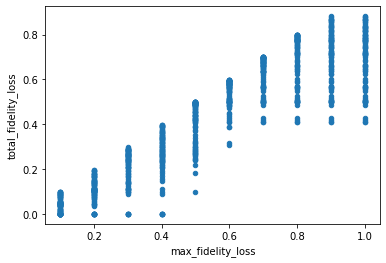

In [4]:
df[(df.strategy == 'brute_force') & df.with_low_rank].plot.scatter(x='max_fidelity_loss', y='total_fidelity_loss')
df['real_cnots_norm'].describe()

In [5]:
# figure, ax = plt.subplots(1, 1)

df['entanglement_bin'] = pd.cut(df.entganglement, 5)

#
# for idx in range(100):
#     df[(df.id == idx) & (df.strategy == 'brute_force') & df.with_low_rank].plot('max_fidelity_loss', 'real_cnots', label=f'{df[df.id == idx].entganglement.iloc[0]}', ax=ax)
#
# figure
df

,id,with_low_rank,strategy,num_qubits,depth,cnots,entganglement,entganglement (MW),max_fidelity_loss,total_saved_cnots,...,real_fidelity_loss,real_fidelity_loss_benchmark,duration,benchmark_fidelity_loss_pass,approximation_calculation_pass,real_approximation_calculation_pass,cnot_prediction_calculation_pass,saved_cnots_calculation_pass,real_cnots_norm,entanglement_bin
0,0,False,brute_force,7,14,151,0.571017,0.611636,0.1,96,...,0.0549,0.0,1.390601,True,True,True,True,True,0.357616,"(0.505, 0.599]"
1,0,False,greedy,7,14,151,0.571017,0.611636,0.1,96,...,0.0549,0.0,1.453099,True,True,True,True,True,0.357616,"(0.505, 0.599]"
2,0,True,brute_force,7,14,151,0.571017,0.611636,0.1,130,...,0.2203,0.0,1.375066,True,True,False,True,True,0.139073,"(0.505, 0.599]"
3,0,True,greedy,7,14,151,0.571017,0.611636,0.1,115,...,0.1951,0.0,1.749987,True,True,False,True,True,0.238411,"(0.505, 0.599]"
4,0,False,brute_force,7,14,151,0.571017,0.611636,0.2,146,...,0.1936,0.0,0.701098,True,True,True,True,True,0.033113,"(0.505, 0.599]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,99,True,greedy,7,7,84,0.673096,0.628701,0.9,84,...,0.6731,-0.0,0.093751,True,True,True,False,True,0.000000,"(0.599, 0.693]"
3996,99,False,brute_force,7,7,84,0.673096,0.628701,1.0,84,...,0.6731,-0.0,0.100685,True,True,True,False,True,0.000000,"(0.599, 0.693]"
3997,99,False,greedy,7,7,84,0.673096,0.628701,1.0,84,...,0.6539,-0.0,0.109413,True,True,True,False,True,0.000000,"(0.599, 0.693]"
3998,99,True,brute_force,7,7,84,0.673096,0.628701,1.0,84,...,0.6731,-0.0,0.093708,True,True,True,False,True,0.000000,"(0.599, 0.693]"


In [6]:
max_fidelity_loss = 0.1
df[(np.abs(df.max_fidelity_loss - max_fidelity_loss) < 1e-6) & (df.strategy == 'brute_force') & (df.with_low_rank)]

,id,with_low_rank,strategy,num_qubits,depth,cnots,entganglement,entganglement (MW),max_fidelity_loss,total_saved_cnots,...,real_fidelity_loss,real_fidelity_loss_benchmark,duration,benchmark_fidelity_loss_pass,approximation_calculation_pass,real_approximation_calculation_pass,cnot_prediction_calculation_pass,saved_cnots_calculation_pass,real_cnots_norm,entanglement_bin
2,0,True,brute_force,7,14,151,0.571017,0.611636,0.1,130,...,0.2203,0.0,1.375066,True,True,False,True,True,0.139073,"(0.505, 0.599]"
42,1,True,brute_force,7,14,151,0.711305,0.835841,0.1,115,...,0.3893,-0.0,1.348079,True,True,False,True,True,0.240000,"(0.693, 0.787]"
82,2,True,brute_force,7,21,151,0.845226,0.947048,0.1,67,...,0.2114,-0.0,3.177983,True,True,False,True,True,0.560000,"(0.787, 0.881]"
122,3,True,brute_force,7,28,151,0.741157,0.948641,0.1,-2,...,-0.0000,-0.0,4.798980,True,True,True,True,True,1.013245,"(0.693, 0.787]"
162,4,True,brute_force,7,21,151,0.792645,0.904831,0.1,67,...,0.0897,-0.0,3.218803,True,True,True,True,True,0.560000,"(0.787, 0.881]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,95,True,brute_force,7,28,151,0.773940,0.922563,0.1,67,...,0.1336,-0.0,3.185779,True,True,False,True,True,0.560000,"(0.693, 0.787]"
3842,96,True,brute_force,7,21,151,0.813941,0.931946,0.1,67,...,0.2018,-0.0,2.984455,True,True,False,True,True,0.556291,"(0.787, 0.881]"
3882,97,True,brute_force,7,7,36,0.500346,0.286214,0.1,35,...,0.0009,-0.0,13.607469,True,True,True,False,True,0.200000,"(0.411, 0.505]"
3922,98,True,brute_force,7,14,151,0.832671,0.896879,0.1,67,...,0.0812,-0.0,1.559468,True,True,True,True,False,0.486667,"(0.787, 0.881]"


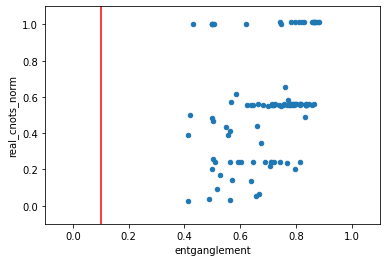

In [7]:
max_fidelity_loss = 0.1
df[(np.abs(df.max_fidelity_loss - max_fidelity_loss) < 1e-6) & (df.strategy == 'brute_force') & (df.with_low_rank)][['entganglement', 'real_cnots_norm']].plot.scatter(x=0, y=1, xlim=(-0.1,1.1), ylim=(-0.1,1.1))
plt.axvline(max_fidelity_loss, color='red')